In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st


In [3]:
df = pd.read_csv(
    r"C:\Users\ASUS\Downloads\2023_Yellow_Taxi_Trip_Data.csv",
    nrows=100000
)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,01/01/2023 12:32:10 AM,01/01/2023 12:40:36 AM,1,0.97,1,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,01/01/2023 12:55:08 AM,01/01/2023 01:01:27 AM,1,1.10,1,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,01/01/2023 12:25:04 AM,01/01/2023 12:37:49 AM,1,2.51,1,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,01/01/2023 12:03:48 AM,01/01/2023 12:13:25 AM,0,1.90,1,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,01/01/2023 12:10:29 AM,01/01/2023 12:21:19 AM,1,1.43,1,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [3]:
df.shape

(100000, 19)

In [4]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
airport_fee              float64
dtype: object

In [32]:
df['lpep_pickup_datetime'] = pd.to_datetime(
    df['lpep_pickup_datetime'], errors='coerce'
)

df['lpep_dropoff_datetime'] = pd.to_datetime(
    df['lpep_dropoff_datetime'], errors='coerce'
)

['passenger_count', 'payment_type', 'fare_amount', 'trip_distance', 'duration']

In [6]:
df = df.dropna(subset=[
    'tpep_pickup_datetime',
    'tpep_dropoff_datetime'
])


In [7]:
df['duration'] = (
    df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
).dt.total_seconds() / 60


In [8]:
df[['tpep_pickup_datetime',
    'tpep_dropoff_datetime',
    'duration']].head()


,tpep_pickup_datetime,tpep_dropoff_datetime,duration
0,2023-01-01 00:32:10,2023-01-01 00:40:36,8.433333
1,2023-01-01 00:55:08,2023-01-01 01:01:27,6.316667
2,2023-01-01 00:25:04,2023-01-01 00:37:49,12.750000
3,2023-01-01 00:03:48,2023-01-01 00:13:25,9.616667
4,2023-01-01 00:10:29,2023-01-01 00:21:19,10.833333


In [9]:
df['duration'].describe()


count    100000.000000
mean         16.709873
std          57.098317
min           0.000000
25%           6.683333
50%          11.566667
75%          19.400000
max        2596.633333
Name: duration, dtype: float64

In [10]:
df = df[["passenger_count", "payment_type", "fare_amount","trip_distance","duration"]]
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,2,9.3,0.97,8.433333
1,1,1,7.9,1.10,6.316667
2,1,1,14.9,2.51,12.750000
3,0,1,12.1,1.90,9.616667
4,1,1,11.4,1.43,10.833333
...,...,...,...,...,...
99995,1,1,21.2,3.72,20.150000
99996,1,1,8.6,0.00,8.100000
99997,1,1,4.4,0.00,2.450000
99998,1,1,7.9,0.00,7.250000


In [11]:
df.isnull().sum()

passenger_count    0
payment_type       0
fare_amount        0
trip_distance      0
duration           0
dtype: int64

In [12]:
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
1679,1,1,6.5,0.71,4.600000
2662,1,1,10.7,2.10,7.350000
2794,1,1,7.2,1.10,5.616667
3383,2,1,5.1,0.75,2.116667
3653,1,1,8.6,1.21,6.166667
...,...,...,...,...,...
99925,1,1,9.3,1.50,8.283333
99951,1,1,9.3,1.43,6.883333
99980,1,2,9.3,1.05,7.750000
99984,1,1,5.8,0.62,3.566667


In [13]:
df.drop_duplicates(inplace = True)

In [14]:
df.shape

(96423, 5)

In [15]:
df["passenger_count"].value_counts(normalize = True)

passenger_count
1    0.645168
2    0.207046
3    0.061085
4    0.041370
0    0.018014
5    0.017154
6    0.010164
Name: proportion, dtype: float64

In [16]:
df["payment_type"].value_counts(normalize = True)

payment_type
1    0.736256
2    0.242504
4    0.013887
3    0.007353
Name: proportion, dtype: float64

In [17]:
df = df [df["payment_type"]<3]
df = df[(df["passenger_count"]>0)&(df["passenger_count"]<6)]

In [18]:
df.shape

(91745, 5)

In [12]:
df = df.loc[(df["passenger_count"] > 0) & (df["passenger_count"] < 6)].copy()

# Replace payment_type codes with labels
df["payment_type"] = df["payment_type"].replace(
    {1: "Card", 2: "Cash"}
)


In [20]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Cash,9.3,0.97,8.433333
1,1,Card,7.9,1.10,6.316667
2,1,Card,14.9,2.51,12.750000
4,1,Card,11.4,1.43,10.833333
5,1,Card,12.8,1.84,12.300000
...,...,...,...,...,...
99995,1,Card,21.2,3.72,20.150000
99996,1,Card,8.6,0.00,8.100000
99997,1,Card,4.4,0.00,2.450000
99998,1,Card,7.9,0.00,7.250000


In [21]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,91745.000000,91745.000000,91745.000000,91745.000000
mean,1.539517,22.539319,5.187000,17.164495
std,0.919768,21.240830,205.934487,56.900960
min,1.000000,-270.320000,0.000000,0.000000
25%,1.000000,9.300000,1.260000,7.066667
50%,1.000000,14.200000,2.290000,12.050000
75%,2.000000,26.800000,5.120000,19.950000
max,5.000000,496.500000,62359.520000,2596.200000


In [22]:
df = df[df["fare_amount"]>0]
df = df[df["trip_distance"]>0]
df = df[df["duration"]>0]

In [23]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Cash,9.3,0.97,8.433333
1,1,Card,7.9,1.10,6.316667
2,1,Card,14.9,2.51,12.750000
4,1,Card,11.4,1.43,10.833333
5,1,Card,12.8,1.84,12.300000
...,...,...,...,...,...
99992,5,Card,33.1,6.89,25.900000
99993,2,Cash,17.0,2.17,17.633333
99994,3,Card,11.4,1.00,11.400000
99995,1,Card,21.2,3.72,20.150000


In [24]:
for col in ["fare_amount", "trip_distance", "duration"]:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [25]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Cash,9.3,0.97,8.433333
1,1,Card,7.9,1.10,6.316667
2,1,Card,14.9,2.51,12.750000
4,1,Card,11.4,1.43,10.833333
5,1,Card,12.8,1.84,12.300000
...,...,...,...,...,...
99992,5,Card,33.1,6.89,25.900000
99993,2,Cash,17.0,2.17,17.633333
99994,3,Card,11.4,1.00,11.400000
99995,1,Card,21.2,3.72,20.150000


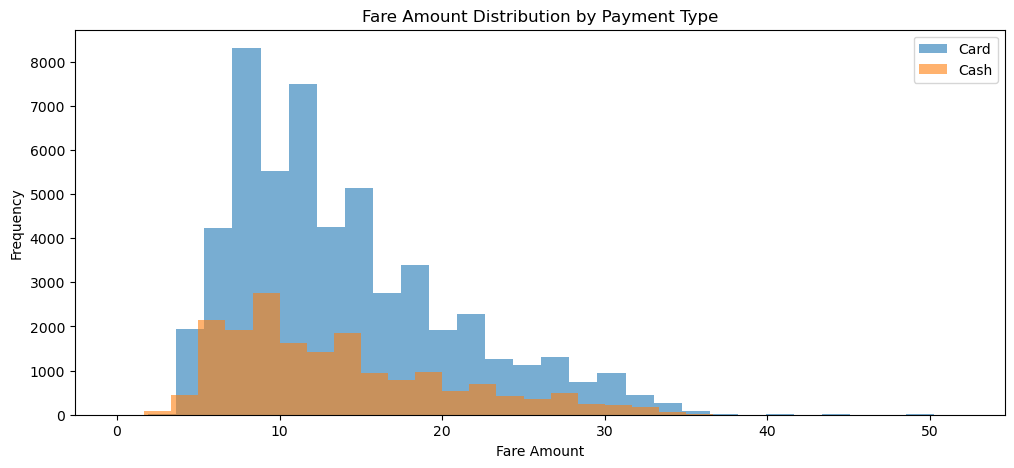

In [26]:
plt.figure(figsize=(12,5))

plt.hist(
    df[df["payment_type"] == "Card"]["fare_amount"],
    bins=30,
    alpha=0.6,
    label="Card"
)

plt.hist(
    df[df["payment_type"] == "Cash"]["fare_amount"],
    bins=30,
    alpha=0.6,
    label="Cash"
)

plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.title("Fare Amount Distribution by Payment Type")
plt.legend()
plt.show()


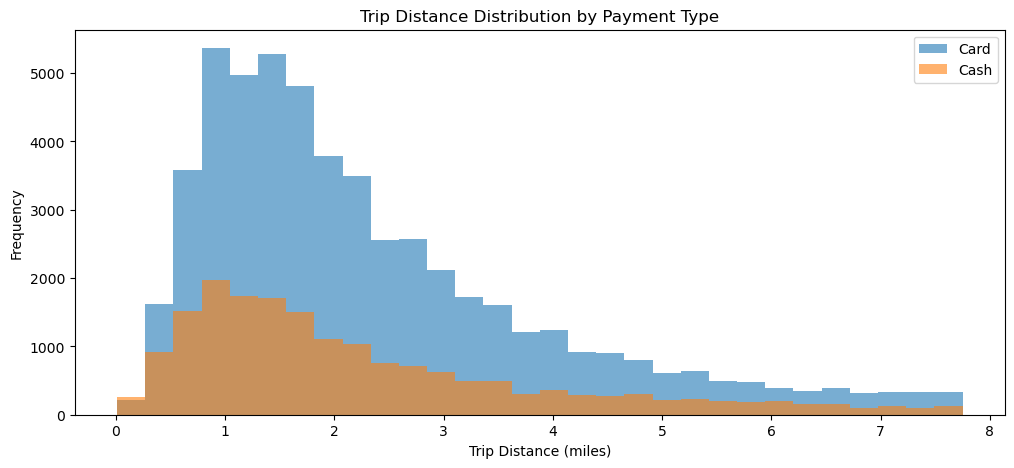

In [27]:
plt.figure(figsize=(12, 5))

plt.hist(
    df[df["payment_type"] == "Card"]["trip_distance"],
    bins=30,
    alpha=0.6,
    label="Card"
)

plt.hist(
    df[df["payment_type"] == "Cash"]["trip_distance"],
    bins=30,
    alpha=0.6,
    label="Cash"
)

plt.xlabel("Trip Distance (miles)")
plt.ylabel("Frequency")
plt.title("Trip Distance Distribution by Payment Type")
plt.legend()
plt.show()


In [33]:
df.groupby("payment_type").agg({"fare_amount":["mean","std"],"trip_distance":["mean","std"]})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           13.832743  6.709436      2.341528  1.594027
Cash           13.561978  6.901953      2.261496  1.684307

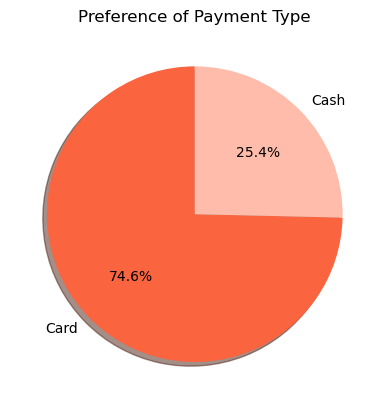

In [36]:
plt.title("Preference of Payment Type")

plt.pie(
    df["payment_type"].value_counts(normalize=True),
    labels=df["payment_type"].value_counts().index,
    startangle=90,          
    shadow=True,
    autopct="%1.1f%%",
    colors=["#FA643F", "#FFBCAB"]
)

plt.show()


In [44]:
passenger_count = (
    df.groupby(["payment_type", "passenger_count"])
      .size()
      .reset_index(name="count")
)

passenger_count["perc"] = (
    passenger_count["count"] / passenger_count["count"].sum()
) * 100

passenger_count


,payment_type,passenger_count,count,perc
0,Card,1,36166,50.471698
1,Card,2,11373,15.871665
2,Card,3,3097,4.322039
3,Card,4,1783,2.488277
4,Card,5,1062,1.482081
5,Cash,1,12084,16.863905
6,Cash,2,3577,4.991906
7,Cash,3,1201,1.676063
8,Cash,4,991,1.382997
9,Cash,5,322,0.449369


In [45]:
df = pd.DataFrame(columns = ["payment_type",1,2,3,4,5])
df["payment_type"] = ["Card","Cash"]
df.iloc[0,1:] = passenger_count.iloc[0:5,-1]
df.iloc[1,1:] = passenger_count.iloc[5:,-1]
df

,payment_type,1,2,3,4,5
0,Card,50.471698,15.871665,4.322039,2.488277,1.482081
1,Cash,16.863905,4.991906,1.676063,1.382997,0.449369


In [49]:
plot_df = (
    passenger_count
    .pivot(index="payment_type",
           columns="passenger_count",
           values="perc")
    .fillna(0)
)


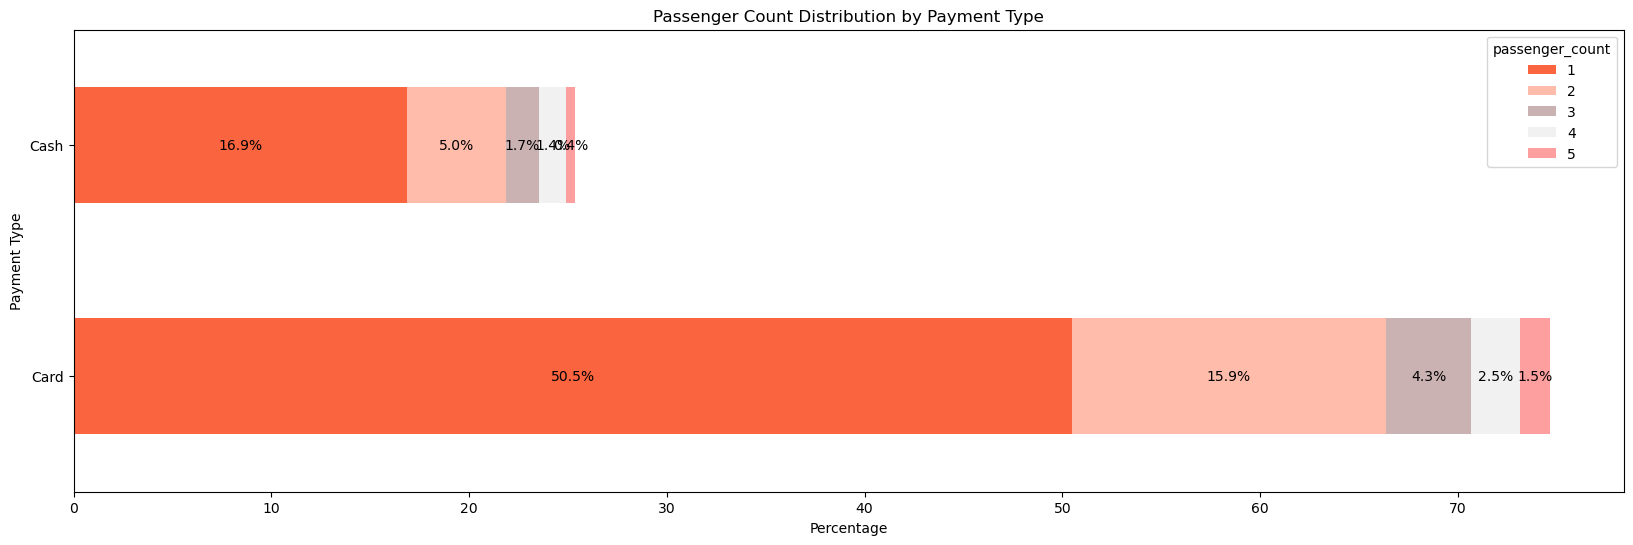

In [52]:
fig, ax = plt.subplots(figsize=(20, 6))

plot_df.plot(
    kind="barh",
    stacked=True,
    ax=ax,
    color=["#FA643F", "#FFBCAB", "#CBB2B2", "#F1F1F1", "#FD9F9F"]
)

ax.set_title("Passenger Count Distribution by Payment Type")
ax.set_xlabel("Percentage")
ax.set_ylabel("Payment Type")

# Add percentage Text
for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(
            p.get_x() + width / 2,
            p.get_y() + p.get_height() / 2,
            f"{width:.1f}%",
            ha="center",
            va="center",
            fontsize=10
        )


In [16]:
df["payment_type"].value_counts(dropna=False)


payment_type
Card    72055
Cash    23181
4        1343
3         692
Name: count, dtype: int64

In [17]:
card_sample = df.loc[df["payment_type"] == "Card", "fare_amount"].dropna()
cash_sample = df.loc[df["payment_type"] == "Cash", "fare_amount"].dropna()


In [18]:
len(card_sample), len(cash_sample)


(72055, 23181)

In [19]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(
    card_sample,
    cash_sample,
    equal_var=False
)

print("T statistic:", t_stat)
print("P-value:", p_value)


T statistic: 13.459102784926019
P-value: 3.352997024815769e-41
